In [1]:
import os
import pandas as pd
import geopandas as gpd

C:\Users\nathanael99\AppData\Local\Temp\ipykernel_3532\1202127250.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from pyincore import IncoreClient, Dataset, DataService, HazardService, FragilityService, MappingSet, FragilityCurveSet
from pyincore_viz.geoutil import GeoUtil as geoviz
from pyincore_viz.plotutil import PlotUtil as plotviz
import pyincore_viz as viz

In [3]:
# Check working directory - good practice for relative path access
os.getcwd()

'c:\\MyProjects\\HRRCProjects\\IN-CORE\\WorkNPR\\github\\IN-CORE_notebooks'

In [4]:
client = IncoreClient()
# IN-CORE caches files on the local machine, it might be necessary to clear the memory
#client.clear_cache() 
data_service = DataService(client) # create data_service object for loading files
hazard_service = HazardService(client)
fragility_services = FragilityService(client)

Connection successful to IN-CORE services. pyIncore version detected: 1.16.0


In [5]:
# Housing Unit Allocation
housing_unit_allocation_id = "65173e4a6b7ce0714cdcd78f"
# load housing unit allocation as pandas dataframe
housing_unit_allocation = Dataset.from_data_service(housing_unit_allocation_id, data_service)
filename = housing_unit_allocation.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Housing Unit Allocation on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Housing Unit Allocation on your local machine: C:\Users\nathanael99\.incore\cache_data\648c22dd689743dc9dedf242006adc5a9c21de9a89c016323dccfedef94f7737\65173e4a6b7ce0714cdcd78f\hua_v2-0-0_Galveston_TX_2010_rs1000_63ff6b135c35c0353d5ed3ac\hua_v2-0-0_Galveston_TX_2010_rs1000_63ff6b135c35c0353d5ed3ac.csv


In [6]:
hua_df = pd.read_csv(filename, header="infer")
hua_df.head()

,huid,blockid,bgid,tractid,FIPScounty,numprec,ownershp,race,hispan,family,...,incomegroup,hhinc,randincome,poverty,BLOCKID10_str,guid,placeNAME10,huestimate,x,y
0,B481677201001000H001,481677201001000,481677201001,48167720100,48167,1,1.0,1.0,0.0,0.0,...,6,3,31459.0,0.0,B481677201001000,missing building id,Friendswood,NaN,-95.211072,29.554253
1,B481677201001000H002,481677201001000,481677201001,48167720100,48167,1,1.0,1.0,0.0,0.0,...,6,3,34695.0,0.0,B481677201001000,missing building id,Friendswood,NaN,-95.211072,29.554253
2,B481677201001000H003,481677201001000,481677201001,48167720100,48167,1,1.0,1.0,0.0,0.0,...,7,3,38776.0,0.0,B481677201001000,missing building id,Friendswood,NaN,-95.211072,29.554253
3,B481677201001000H004,481677201001000,481677201001,48167720100,48167,1,1.0,1.0,0.0,0.0,...,10,3,52398.0,0.0,B481677201001000,missing building id,Friendswood,NaN,-95.211072,29.554253
4,B481677201001000H005,481677201001000,481677201001,48167720100,48167,1,1.0,1.0,0.0,0.0,...,11,3,69564.0,0.0,B481677201001000,missing building id,Friendswood,NaN,-95.211072,29.554253


## Clean Data
Select data for Galveston Island. Which is the city of Galveston and Jamaica Beach.

<Axes: >

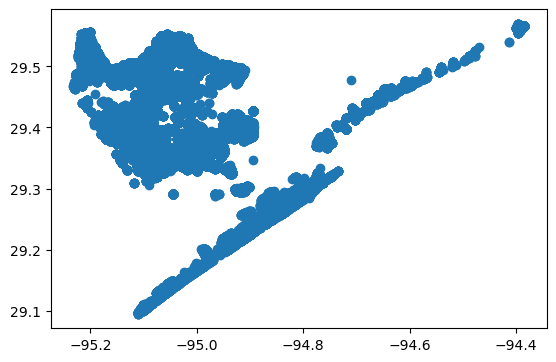

In [7]:
# convert dataframe to geodataframe
hua_gdf = gpd.GeoDataFrame(hua_df, geometry=gpd.points_from_xy(hua_df.x, hua_df.y))
hua_gdf.crs = "EPSG:4326"
# plot data
hua_gdf.plot()

In [8]:
# list all unique values of placeNAME10 with sum of people
hua_gdf[['numprec','placeNAME10']].groupby('placeNAME10').sum()

,numprec
placeNAME10,
Bacliff,8521
Bayou Vista,1537
Bolivar Peninsula,2405
Clear Lake Shores,1063
Dickinson,18533
Friendswood,25436
Galveston,47453
Hitchcock,6910
Jamaica Beach,983


In [9]:
# select if placeNAME10 Galveston or Jamaica Beach
hua_gdf_island = hua_gdf[hua_df['placeNAME10'].isin(['Galveston','Jamaica Beach'])].copy(deep=True)

In [10]:
hua_gdf_island[['numprec','placeNAME10']].groupby('placeNAME10').sum()

,numprec
placeNAME10,
Galveston,47453
Jamaica Beach,983


<Axes: >

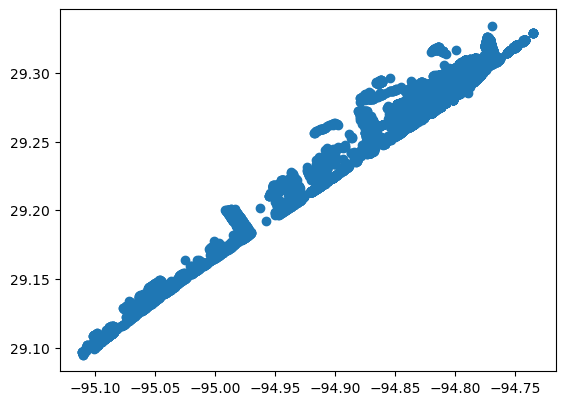

In [11]:
# plot data
hua_gdf_island.plot()

In [13]:
# select observations where poverty = 1
hua_gdf_island_poverty = hua_gdf_island[hua_gdf_island['poverty'] == 1].copy(deep=True)
# reset index for heatmap
hua_gdf_island_poverty.reset_index(inplace=True)
hua_gdf_island_poverty[['numprec','placeNAME10']].groupby('placeNAME10').sum()

,numprec
placeNAME10,
Galveston,11023
Jamaica Beach,81


<Axes: >

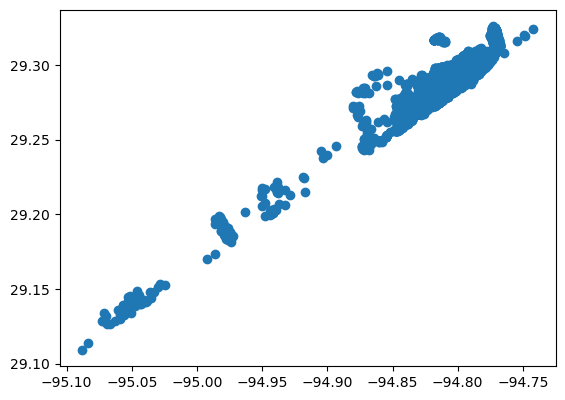

In [14]:
# plot data
hua_gdf_island_poverty.plot()


In [15]:
# select observations where low income, tenure = 2, and race != 1 and hispan != 0
# low income is defined as below median income of randincome
median_income = hua_gdf_island['randincome'].median()
print("The median income is: "+str(median_income))

condition1 = (hua_gdf_island['randincome'] <= median_income)
condition2 = (hua_gdf_island['ownershp'] == 2)
condition3 = (hua_gdf_island['race'] != 1)
condition4 = (hua_gdf_island['hispan'] != 0)
hua_gdf_highSVI = hua_gdf_island[condition1 & condition2 & condition3 & condition4].copy(deep=True)
# reset index for heatmap
hua_gdf_highSVI.reset_index(inplace=True)
hua_gdf_highSVI[['numprec','placeNAME10']].groupby('placeNAME10').sum()

The median income is: 38845.0


,numprec
placeNAME10,
Galveston,2129
Jamaica Beach,8


<Axes: >

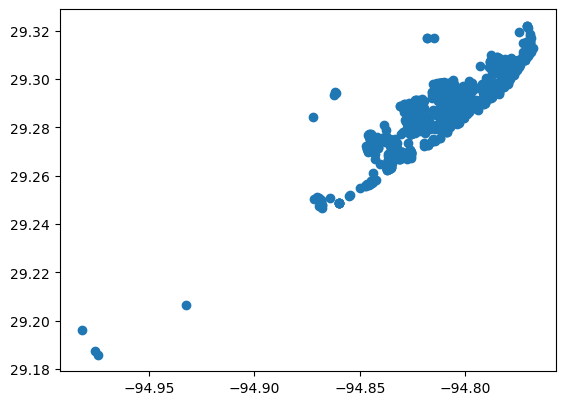

In [16]:
hua_gdf_highSVI.plot()

## Explore Data
Make a heat map of poverty

In [17]:
help(geoviz.plot_heatmap_from_gdf)

Help on function plot_heatmap_from_gdf in module pyincore_viz.geoutil:

plot_heatmap_from_gdf(gdf, fld_name, radius=10, blur=10, max=1, multiplier=1, name='')
    Creates ipyleaflet map object and fit the map using the bounding box information.
    
    Args:
        gdf (GeoDataFrame): GeoPandas geodataframe.
        fld_name (str): column name to be plot in heat map.
        radius (float): Radius of each "point" of the heatmap.
        blur (float): Amount of blur.
        max (float): Maximum point intensity.
        multiplier (float): A multiplication factor for making fld value to more clearly in the map.
        name (str): A name that represents the layer.
    
    Returns:
        obj: An ipyleaflet map.



In [18]:
map = geoviz.plot_heatmap_from_gdf(gdf = hua_gdf_island_poverty,
                            fld_name = 'numprec',
                            radius = 5,
                            blur = 5,
                            name = 'Poverty')
map

Map(center=[29.217564353279595, -94.9151435443301], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [19]:
map = geoviz.plot_heatmap_from_gdf(gdf = hua_gdf_highSVI,
                            fld_name = 'numprec',
                            radius = 10,
                            blur = 5,
                            name = 'Low income minorty renters')
map

Map(center=[29.2539943524561, -94.87476235868948], controls=(ZoomControl(options=['position', 'zoom_in_text', …